In [12]:
! ls ../data/*.bam

../data/SRR2165704_ref-hg_chrM_mapped.bam ../data/SRR2165704_ref-numt_chrM.bam      ../data/srt.chrM_SRR2164514.kallisto.bam
../data/SRR2165704_ref-mt_chrM_mapped.bam ../data/srt.chrM_SRR2156397.kallisto.bam  ../data/srt.chrM_SRR2170756.kallisto.bam


In [13]:
import pysam

In [14]:
bam = pysam.Samfile("../data/SRR2165704_ref-hg_chrM_mapped.bam", "rb")

In [15]:
for read in bam:
    print dir(read)
    break

['__class__', '__delattr__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'aend', 'alen', 'aligned_pairs', 'bin', 'blocks', 'cigar', 'cigarstring', 'cigartuples', 'compare', 'flag', 'get_aligned_pairs', 'get_blocks', 'get_overlap', 'get_reference_positions', 'get_tag', 'get_tags', 'has_tag', 'infer_query_length', 'inferred_length', 'is_duplicate', 'is_paired', 'is_proper_pair', 'is_qcfail', 'is_read1', 'is_read2', 'is_reverse', 'is_secondary', 'is_unmapped', 'isize', 'mapping_quality', 'mapq', 'mate_is_reverse', 'mate_is_unmapped', 'mpos', 'mrnm', 'next_reference_id', 'next_reference_start', 'opt', 'overlap', 'pnext', 'pos', 'positions', 'qend', 'qlen', 'qname', 'qqual', 'qstart', 'qual', 'query', 'query_alignment_end', 'query_alignment_length', 'query_alignment_qualities', 'query_alignment_sequence', 'query_alignment_start', 'query

In [16]:
n=0
qual=[]
alen=[]
soft=[]
for read in bam:
    if read.is_paired                 \
       and read.is_proper_pair        \
       and not read.is_unmapped       \
       and not read.is_secondary     \
       and not read.mate_is_unmapped \ :
            
        qual.append(read.mapping_quality)
        alen.append(read.query_alignment_length)
        cigar = dict(read.cigartuples)
        n+=1
        if 4 in cigar.keys():
            soft.append(cigar[4])

In [17]:
n

138976

In [18]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

(array([   1909.,     427.,     281.,     300.,    7177.,     626.,
           8033.,    1974.,   14279.,  103970.]),
 array([  0.,   6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.]),
 <a list of 10 Patch objects>)

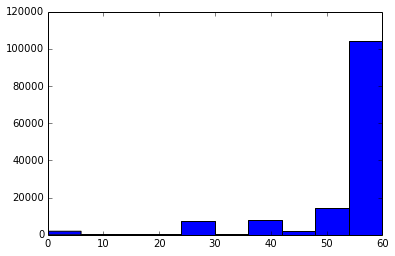

In [19]:
%matplotlib inline

plt.hist(qual)

(array([  7.10000000e+01,   9.90000000e+01,   9.20000000e+01,
          1.20000000e+02,   1.55000000e+02,   2.00000000e+02,
          2.16000000e+02,   2.79000000e+02,   3.63000000e+02,
          1.37381000e+05]),
 array([  19. ,   27.2,   35.4,   43.6,   51.8,   60. ,   68.2,   76.4,
          84.6,   92.8,  101. ]),
 <a list of 10 Patch objects>)

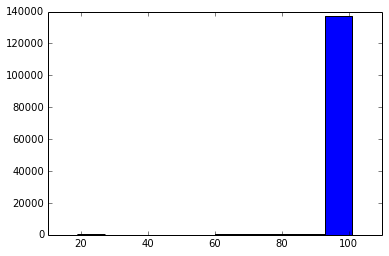

In [20]:
%matplotlib inline

plt.hist(alen)

In [21]:
read.cigartuples

[(0, 32), (4, 69)]

(array([ 717.,  364.,  282.,  202.,  172.,  147.,  112.,   79.,   80.,   55.]),
 array([  1. ,   9.1,  17.2,  25.3,  33.4,  41.5,  49.6,  57.7,  65.8,
         73.9,  82. ]),
 <a list of 10 Patch objects>)

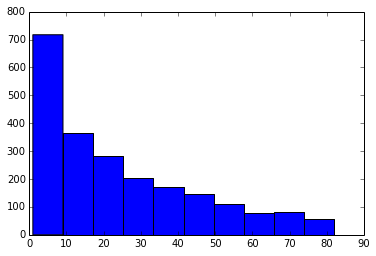

In [22]:
%matplotlib inline

plt.hist(soft)